# Random Forest, test 2 avec interface

Texte obtenu sur https://www.lovelyanalytics.com/2020/06/08/random-forest-tutoriel-python/

## Chargement des librairies Python

In [1]:
import pandas as pd  
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Chargement des données

In [2]:
df = pd.read_csv('Base_donne_VF.tsv',sep="\t")
print("Le fichier a " + str(df.shape[0]) + " lignes et " + str(df.shape[1]) + " colonnes")

Le fichier a 372 lignes et 35 colonnes


## Exploration des données

In [3]:
#Liste des colonnes et leur type 
df.dtypes

df

,Nom Alliage,Prix (US$/kg),E (GPa),Ni,Cr,Fe,C,Cu,Ti,W,...,[HCl],[Cl-] hors HCL,[Fe3+],[H2SO4]/[HNO3],[HBR],[SO2] . [CO2/H2S],Fe2SO4,[ions métalliques] [Na-.K-] hors acidifiant,Force appliquée (N.m),Vitesse du courant (m/s)
0,N0625,43.180,206.0,62.0,22.0,5.0,0.10,0.5,0.4,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1,N0625,43.180,206.0,62.0,22.0,5.0,0.10,0.5,0.4,0.0,...,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
2,N0625,43.180,206.0,62.0,22.0,5.0,0.10,0.5,0.4,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
3,N0625,43.180,206.0,62.0,22.0,5.0,0.10,0.5,0.4,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4,N0625,43.180,206.0,62.0,22.0,5.0,0.10,0.5,0.4,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,304L,2.529,203.0,12.0,20.0,75.0,0.03,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0,0,0.0
368,304L,2.529,203.0,12.0,20.0,75.0,0.03,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0,0,0.0
369,304H,2.609,203.0,10.5,20.0,78.0,0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0,0,0.0
370,304H,2.609,203.0,10.5,20.0,78.0,0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0,0,0.0


## Analyse de la qualité des données avec panda profiling

On fait un état des lieux de la qualité des données :
– Données manquantes
– Données corrélées
– Valeurs extrêmes
– Statistiques descriptives (moyenne, écart-type, …)
– Distribution des variables

In [5]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Exploration et visualisation de données

Analyse des corrélations

In [8]:
# Matrice des corrélations : 
cor = df.corr() 
plt.subplots(figsize=(20,15))


(<Figure size 2000x1500 with 1 Axes>, <AxesSubplot:>)

## Data prep avant d’utiliser un Random Forest

Suppression de '[O2] dans le milieu', 'Force appliquée (N.m)'

A réfléchir : supprimer PREN qui a une forte correlation avec Mo et CCP

In [9]:
# On met le nom de l'alliage en index
pd.DataFrame.set_index(df, 'Nom Alliage',inplace=True)
# On supprime les colonnes choisies
df.drop(columns =['[O2] dans le milieu', 'Force appliquée (N.m)'],inplace=True)
df

# Nouvelle matrice des corrélations : 
cor = df.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(cor, square = True, cmap="coolwarm",annot=True)


#On stocke la variable à prédire dans cible
cible1 = np.array(df['CCT '])
cible2 = np.array(df['PREN'])
cible3 = np.array(df['E (GPa)'])
cible4 = np.array(df['Vcorr (micromètre/an)'])
cible6 = np.array(df['Prix (US$/kg)'])
#On supprime cette variable du dataset
df= df.drop('CCT ', axis = 1)
df= df.drop('PREN', axis = 1)
df= df.drop('E (GPa)', axis = 1)
df= df.drop('Vcorr (micromètre/an)', axis = 1)
df= df.drop('Prix (US$/kg)', axis = 1)
#On conserve les noms de variable à part
liste_variables = list(df.columns)


#On convertit le dataset en array
df = np.array(df)



## Modélisation : Training Random Forest

On transforme les données en Numpy arrays pour pouvoir les utiliser dans le modèle

#On stocke la variable à prédire dans cible
cible1 = np.array(df['CCT '])
cible2 = np.array(df['PREN'])
cible3 = np.array(df['E (GPa)'])
cible4 = np.array(df['Vcorr (mm/an)'])
cible5 = np.array(df['E corrosion (V)'])
cible6 = np.array(df['Prix (US$/kg)'])
#On supprime cette variable du dataset
df= df.drop('CCT ', axis = 1)
df= df.drop('PREN', axis = 1)
df= df.drop('E (GPa)', axis = 1)
df= df.drop('Vcorr (mm/an)', axis = 1)
df= df.drop('E corrosion (V)', axis = 1)
df= df.drop('Prix (US$/kg)', axis = 1)
#On conserve les noms de variable à part
liste_variables = list(df.columns)
#On convertit le dataset en array
df = np.array(df)

## Split du dataset en train et test

On choisit de faire l’apprentissage sur un échantillon d’apprentissage de 75% des données et de faire le test sur 25% des données. On va également séparer la variable à prédire Happiness.Score des variables de prédiction

In [10]:
#On créé 4 dataset : 
#   - x_train contient 75% de x  
#   - y_train contient le CCT associé à x_train
# => x_train et y_train permettront d'entraîner l'algorithme
#
#   - x_test contient 25% de x  
#   - y_test contient le CCT associé à x_test
# => x_test et y_test permettront d'évaluer la performance de l'algorithme une fois entrainé sur le train
x1_train,x1_test,y1_train,y1_test=train_test_split(df,cible1,test_size=0.25, random_state=2020)
x2_train,x2_test,y2_train,y2_test=train_test_split(df,cible2,test_size=0.25, random_state=2020)
x3_train,x3_test,y3_train,y3_test=train_test_split(df,cible3,test_size=0.25, random_state=2020)
x4_train,x4_test,y4_train,y4_test=train_test_split(df,cible4,test_size=0.25, random_state=2020)
x6_train,x6_test,y6_train,y6_test=train_test_split(df,cible6,test_size=0.25, random_state=2020)

## Apprentissage

J’ai choisi d’utiliser un algorithme Random Forest.

In [ ]:
#On importe l'algorithme à partir de sklearn
from sklearn.ensemble import RandomForestRegressor
#On créé un Random Forest de 100 arbres 

rf1 = RandomForestRegressor(n_estimators = 50, random_state = 2020)
rf2 = RandomForestRegressor(n_estimators = 50, random_state = 2020)
rf3 = RandomForestRegressor(n_estimators = 50, random_state = 2020)
rf4 = RandomForestRegressor(n_estimators = 50, random_state = 2020)
rf6 = RandomForestRegressor(n_estimators = 50, random_state = 2020)


##### FOR CCT #####

#On lance le training sur notre dataset de train
rf1.fit(x1_train, y1_train)

#On applique le modèle que l'on vient d'entraîner sur l'échantillon de test
predictions = rf1.predict(x1_test)

# MAE 
erreurs = abs(predictions - y1_test)
print('Mean Absolute Error for CCT:', round(np.mean(erreurs), 10))

# MAPE
mape = 100 * (erreurs / y1_test)
print('Mean Absolute % Error for CCT:', round(np.mean(mape), 10), '%.')

##### FOR PREN #####

rf2.fit(x2_train, y2_train)
predictions = rf2.predict(x2_test)
erreurs = abs(predictions - y2_test)
print('Mean Absolute Error for PREN:', round(np.mean(erreurs), 10))
mape = 100 * (erreurs / y2_test)
print('Mean Absolute % Error for PREN:', round(np.mean(mape), 10), '%.')

##### FOR E #####

rf3.fit(x3_train, y3_train)
predictions = rf3.predict(x3_test)
erreurs = abs(predictions - y3_test)
print('Mean Absolute Error for E:', round(np.mean(erreurs), 10))
mape = 100 * (erreurs / y3_test)
print('Mean Absolute % Error for E:', round(np.mean(mape), 10), '%.')

##### FOR Vcorr #####

rf4.fit(x4_train, y4_train)
predictions = rf4.predict(x4_test)
erreurs = abs(predictions - y4_test)
print('Mean Absolute Error for Vcorr:', round(np.mean(erreurs), 10))
mape = 100 * (erreurs / y4_test)
print('Mean Absolute % Error for Vcorr:', round(np.mean(mape), 10), '%.')


##### FOR Prix #####

rf6.fit(x6_train, y6_train)
predictions = rf6.predict(x6_test)
erreurs = abs(predictions - y6_test)
print('Mean Absolute Error for Prix:', round(np.mean(erreurs), 10))
mape = 100 * (erreurs / y6_test)
print('Mean Absolute % Error for Prix:', round(np.mean(mape), 10), '%.')

Mean Absolute Error for CCT: 1.5249462366
Mean Absolute % Error for CCT: 18.4468680662 %.
Mean Absolute Error for PREN: 0.6456774194
Mean Absolute % Error for PREN: 7.8208500831 %.
Mean Absolute Error for E: 0.5705376344
Mean Absolute % Error for E: 0.3169016669 %.
Mean Absolute Error for Vcorr: 2293.199177574
Mean Absolute % Error for Vcorr: 22119.2866125779 %.
Mean Absolute Error for Prix: 0.7953339785
Mean Absolute % Error for Prix: 2.8687384439 %.


##  Interprétation des résultats

On calcule les variables d’importance du modèle, c’est à dire celles qui contribuent le plus.

Text(0.5, 0, 'Relative Importances')

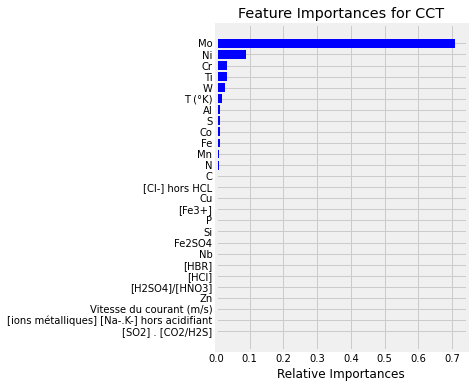

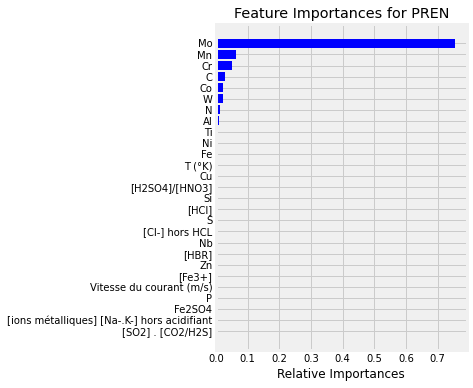

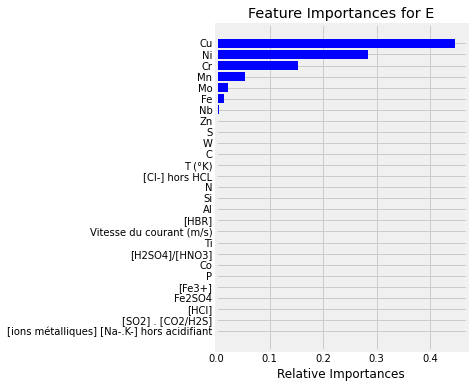

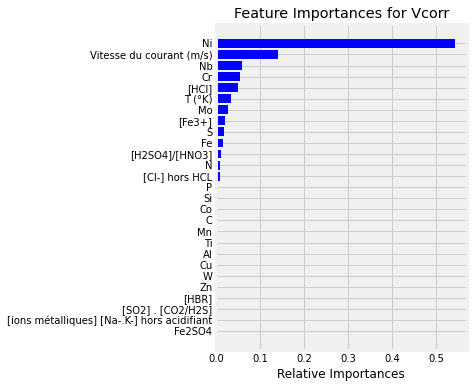

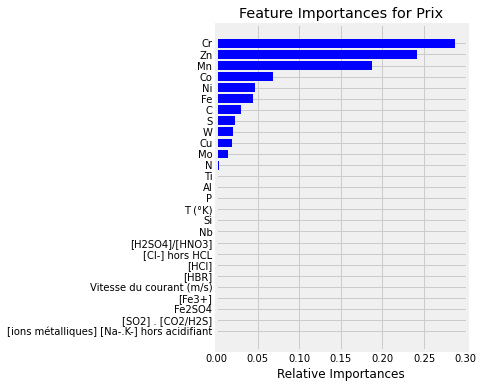

In [ ]:
importances1 = rf1.feature_importances_
indices1 = np.argsort(importances1)

importances2 = rf2.feature_importances_
indices2 = np.argsort(importances2)

importances3 = rf3.feature_importances_
indices3 = np.argsort(importances3)

importances4 = rf4.feature_importances_
indices4 = np.argsort(importances4)

importances6 = rf6.feature_importances_
indices6 = np.argsort(importances6)

# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline

plt.figure(1,figsize=(4,6))
plt.title('Feature Importances for CCT')
plt.barh(range(len(indices1)), importances1[indices1], color='b', align='center')
plt.yticks(range(len(indices1)), [liste_variables[i] for i in indices1])
plt.xlabel('Relative Importances')

plt.figure(2,figsize=(4,6))
plt.title('Feature Importances for PREN')
plt.barh(range(len(indices2)), importances2[indices2], color='b', align='center')
plt.yticks(range(len(indices2)), [liste_variables[i] for i in indices2])
plt.xlabel('Relative Importances')

plt.figure(3,figsize=(4,6))
plt.title('Feature Importances for E')
plt.barh(range(len(indices3)), importances3[indices3], color='b', align='center')
plt.yticks(range(len(indices3)), [liste_variables[i] for i in indices3])
plt.xlabel('Relative Importances')

plt.figure(4,figsize=(4,6))
plt.title('Feature Importances for Vcorr')
plt.barh(range(len(indices4)), importances4[indices4], color='b', align='center')
plt.yticks(range(len(indices4)), [liste_variables[i] for i in indices4])
plt.xlabel('Relative Importances')

plt.figure(6,figsize=(4,6))
plt.title('Feature Importances for Prix')
plt.barh(range(len(indices6)), importances6[indices6], color='b', align='center')
plt.yticks(range(len(indices6)), [liste_variables[i] for i in indices6])
plt.xlabel('Relative Importances')

## Test du programme

In [ ]:
x1_test

array([[42. , 21.5, 28. , ...,  0. ,  0. ,  0. ],
       [62. , 15. ,  2. , ...,  0. ,  0. ,  0. ],
       [59. , 23. ,  3. , ...,  0. ,  0. ,  0. ],
       ...,
       [64.7,  0. ,  1. , ...,  0. ,  0. , 45.7],
       [57. , 16. ,  5. , ...,  0. ,  0. ,  0. ],
       [56. , 22. ,  3. , ...,  0. ,  0. ,  0. ]])

In [ ]:
x1_test[0:1,:]

array([[4.200e+01, 2.150e+01, 2.800e+01, 3.000e-02, 3.000e+00, 0.000e+00,
        0.000e+00, 1.800e-01, 0.000e+00, 4.900e-02, 0.000e+00, 1.000e-02,
        4.500e-01, 2.300e-01, 3.000e+00, 8.000e-03, 5.000e-03, 3.235e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 6.000e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00]])

In [ ]:
rf1.predict(x1_test[0:1,:])

array([8.35])

 # Interface utilisateur

In [ ]:
import tkinter
import tkinter.font as tkFont
from tkinter import *

def IA():
    if CCT.get()==1 :
        CCTpred = rf1.predict([[float(vars1[i].get()) for i in range(len(vars1))]])
        tkinter.Label(param, text = 'CCT : %d'% CCTpred).grid(row=1, column=6)
    if PREN.get()==1 :
        PRENpred = rf2.predict([[float(vars1[i].get()) for i in range(len(vars1))]])
        tkinter.Label(param, text = 'PREN : %d'% PRENpred).grid(row=2, column=6)
    if E.get()==1 :
        Epred = rf3.predict([[float(vars1[i].get()) for i in range(len(vars1))]])
        tkinter.Label(param, text = 'E : %d'% Epred).grid(row=3, column=6)
    if Vcorr.get()==1 :
        Vcorrpred = rf4.predict([[float(vars1[i].get()) for i in range(len(vars1))]])
        tkinter.Label(param, text = 'Vcorr : %d'% Vcorrpred).grid(row=4, column=6)
    if Prix.get()==1 :
        Prixpred = rf6.predict([[float(vars1[i].get()) for i in range(len(vars1))]])
        tkinter.Label(param, text = 'Prix : %d'% Prixpred).grid(row=5, column=6)
    #param.mainloop()   
    



vars1 = []

param= tkinter.Tk()

#param_ini = tkinter.Tk()
#param = Canvas(param_ini)
#param.grid(row=20, column=10, sticky=(N,E,S,W))


tkinter.Label(param, text="Quelles conditions expérimentales ?", font='Helvetica 12 bold').grid(row=0, column=0)


for i in range(0,15):
    var=tkinter.StringVar()
    var.set(0)
    item = liste_variables[i]
    tkinter.Label(param, text=item, height=2).grid(row=i+1, column=0)
    Ent = tkinter.Entry(param, text=item, width=20,
                        textvariable=var
                       ).grid(row=i+1, column=1)
    vars1.append(var)
    
for i in range(15,len(liste_variables)):
    var=tkinter.StringVar()
    var.set(0)
    item = liste_variables[i]
    tkinter.Label(param, text=item, height=2).grid(row=i-14, column=2)
    Ent = tkinter.Entry(param, text=item, width=20,
                        textvariable=var).grid(row=i-14, column=3)
    vars1.append(var)



#for i in range(0,len(liste_variables)):
#    var=tkinter.StringVar()
#    var.set(0)
#    item = liste_variables[i]
#    tkinter.Label(param, text=item, height=2).grid(row=i+1, column=0)
#    Ent = tkinter.Entry(param, text=item, width=20,
#                        textvariable=var
#                       ).grid(row=i+1, column=1)
#    vars1.append(var)
    

#print(vars1)

#for elem in vars1 :
 #   elem2 = elem.get()
  #  print( elem2)
    

    
CCT = tkinter.IntVar()  
PREN = tkinter.IntVar()
E = tkinter.IntVar()
Vcorr= tkinter.IntVar()
Ecorr= tkinter.IntVar()
Prix= tkinter.IntVar()
  
tkinter.Label(param, text="Que voulez-vous en sortie?", font='Helvetica 12 bold', width=30).grid(row=0, column=5)
CB1=tkinter.Checkbutton(param, text='CCT (°K)',variable=CCT,onvalue = 1, offvalue = 0, width=30, height=2).grid(row=1, column=5)
CB2=tkinter.Checkbutton(param, text='PREN',variable=PREN,onvalue = 1, offvalue = 0, width=30, height=2).grid(row=2, column=5)
CB3=tkinter.Checkbutton(param, text='E (GPa)',variable=E,onvalue = 1, offvalue = 0, width=30, height=2).grid(row=3, column=5)
CB4=tkinter.Checkbutton(param, text='Vcorr (micromètres/an)',variable=Vcorr,onvalue = 1, offvalue = 0, width=30, height=2).grid(row=4, column=5)
CB6=tkinter.Checkbutton(param, text='Prix (US$/kg)',variable=Prix,onvalue = 1, offvalue = 0, width=30, height=2).grid(row=5, column=5)
b = tkinter.Button(param, text='Allons-y', command=IA, width=20, height=5).grid(row=6, column=5)

#vsbar = tkinter.Scrollbar(param, orient="vertical", command=param.yview)
#param.configure(yscrollcommand=vsbar.set)

#vsbar.grid(row=0, column=5, rowspan= 5, sticky=tkinter.NS)


#scrollbar = tkinter.Scrollbar(param)
#scrollbar.grid(row=0, column=5, rowspan= 5, sticky=tkinter.NS)

#scrollbar.config(command= param.yview)

#param.config(yscrollcommand = scrollbar.set)


mainloop()


param.mainloop()


ModuleNotFoundError: No module named 'tkinter'